<a href="https://colab.research.google.com/github/Charan-14/ComputerVision_DL/blob/main/Copy_of_Segmentation_and_Counting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing all the libraries required to use image processing and watershed algorithm for overlap separation
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import os

%matplotlib inline
%reload_ext autoreload



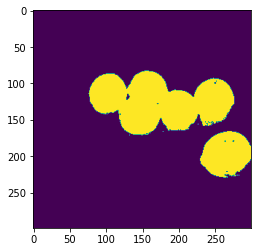

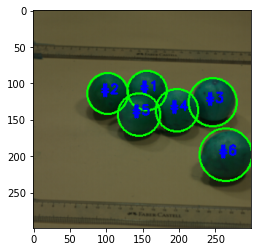

No. of lemons found :  6


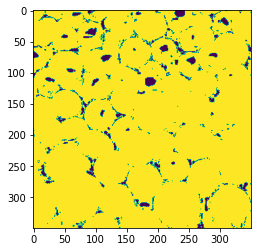

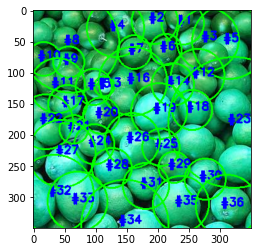

No. of lemons found :  36


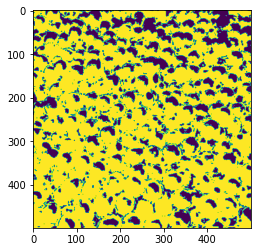

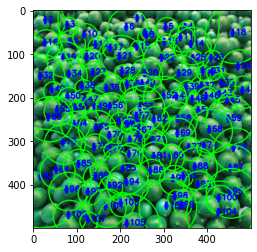

No. of lemons found :  107


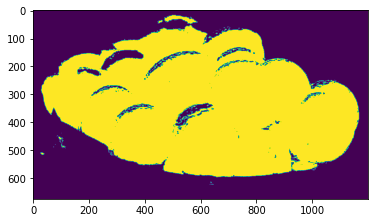

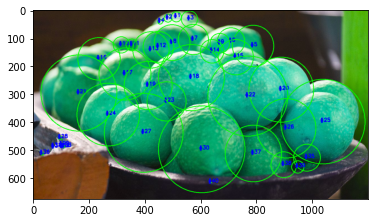

No. of lemons found :  40


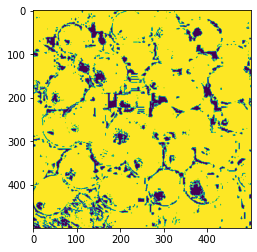

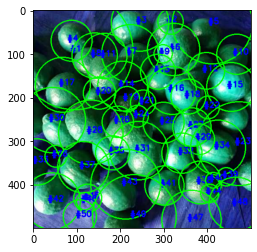

No. of lemons found :  50


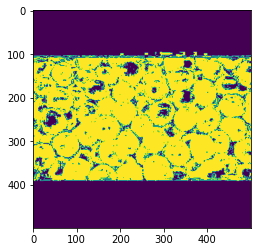

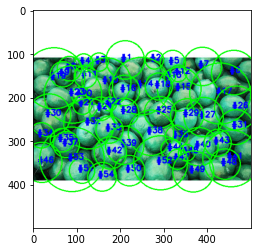

No. of lemons found :  54


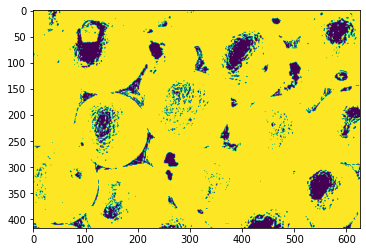

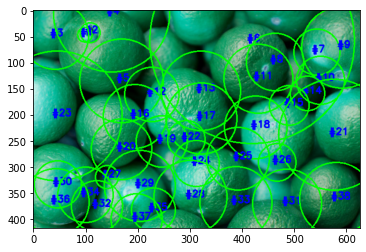

No. of lemons found :  38


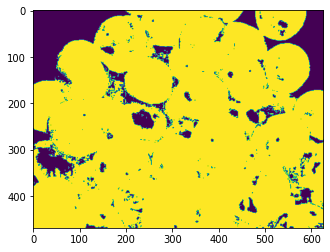

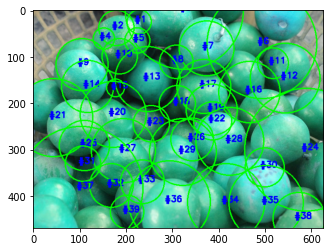

No. of lemons found :  39


In [ ]:
# Function to view the images
def show(img):
    plt.imshow(img)
    plt.show()

#Path to the images
path = "/content/drive/My Drive/Coding_round_images"

#Showing result for every image
for x in os.listdir(path):
        
    lemons = cv.imread(os.path.join(path,x))
#Converting the image from BGR to HLS to isolate the green color specifically tuning the saturation channel
    hls = cv.cvtColor(lemons, cv.COLOR_BGR2HLS)

#Here i used a trackbar to tune the value of the color channel     
    lower_hls = np.array([0, 0, 93])#lower_y = np.array([8, 122, 115])
    upper_hls = np.array([56, 255, 255])#upper_y = np.array([47, 172, 151])
#Now we create a mask with the specific range of color channel and find a intersection with the original image and the mask (AND operation)    
    mask_hls = cv.inRange(hls, lower_hls, upper_hls)
    res_hls = cv.bitwise_and(lemons, lemons, mask=mask_hls)

#Converting the image to binary     
    res_hls = cv.cvtColor(res_hls, cv.COLOR_BGR2GRAY)
    _, thr = cv.threshold(res_hls, 0, 255, cv.THRESH_BINARY)
    show(thr)

#Finally using the Watershed algorithm to segment overlaped objects 
    D = ndimage.distance_transform_edt(thr)
    localMax = peak_local_max(D, indices=False, min_distance=20, labels=thr)
    markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
    labels = watershed(-D, markers, mask=thr)


    lemons_copy = lemons.copy()

#For each extracted segment label we create a mask for that segment itself and display a contour around it and count the no of lemons
    for label in np.unique(labels):
        # if the label is zero, we are examining the 'background'
        # so simply ignore it
        if label == 0:
            continue
        # otherwise draw it as a mask white
        mask = np.zeros(thr.shape, dtype="uint8")
        mask[labels == label] = 255
        # detect contours in the mask and find the largest one
        cnts, _ = cv.findContours(mask.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        c = max(cnts, key=cv.contourArea)
        # draw a circle enclosing the object
        ((x, y), r) = cv.minEnclosingCircle(c)
        cv.circle(lemons_copy, (int(x), int(y)), int(r), (0, 255, 0), 2)
        cv.putText(lemons_copy, "#{}".format(label), (int(x) - 10, int(y)), cv.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    # show the output image
    show(lemons_copy)
    print("No. of lemons found : ", len(np.unique(labels))-1)

